In [1]:
# Basic building-block packages
import numpy as np
from numpy import heaviside as th

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Some fancy-smancy maths!! (not really)
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm
import pickle

import scipy.fftpack as fft

import pandas as pd

## Data Reaeding

In [41]:
data = pd.read_csv("C:/users/cosin/quasi2.csv")
time = data['TIME']
X = data['CH1']
Y = data['CH2']
Z = data ['CH3']
print(Z[1])

0.0


## Phase Diagram,FFT, Poincare

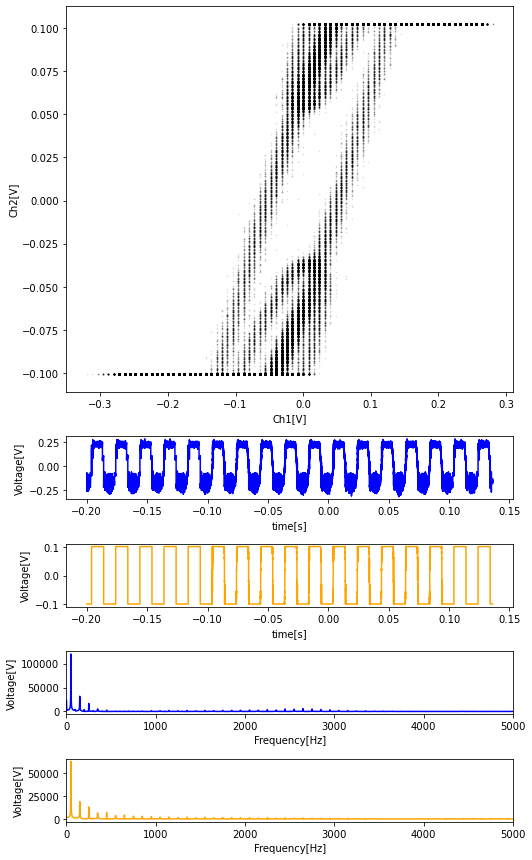

In [54]:
F=3.5
f=800

x=X.to_numpy()
y=Y.to_numpy()

Xf = fft.fft(x)
Yf = fft.fft(y)

samp = len(X)
tau = 3.2e-7 # sample interval

freq = fft.fftfreq(len(x), tau)

fig = plt.figure(figsize=(8,15))
grid = gs.GridSpec(8,1,hspace=0.7,)

axs1 = plt.subplot(grid[0:4,0])
axs3 = plt.subplot(grid[4,0])
axs4 = plt.subplot(grid[5,0])
axs5 = plt.subplot(grid[6,0])
axs6 = plt.subplot(grid[7,0])

axs1.scatter(Y,X, color="black", s=0.5, alpha=0.1)
axs3.plot(time,Y,color='blue')
axs4.plot(time,X,color='orange')
axs5.plot(freq[freq>=0], np.abs(Yf)[freq>=0], color='blue')
axs6.plot(freq[freq>=0], np.abs(Xf)[freq>=0], color='orange')

axs1.set_xlabel("Ch1[V]")
axs1.set_ylabel("Ch2[V]")

axs3.set_xlabel("time[s]")
axs3.set_ylabel("Voltage[V]")
axs4.set_xlabel("time[s]")
axs4.set_ylabel("Voltage[V]")

axs5.set_xlabel("Frequency[Hz]")
axs5.set_ylabel("Voltage[V]")
axs6.set_xlabel("Frequency[Hz]")
axs6.set_ylabel("Voltage[V]")

axs5.set_xlim(left=0, right=5000)
axs6.set_xlim(left=0, right=5000)

plt.savefig('qua.png')

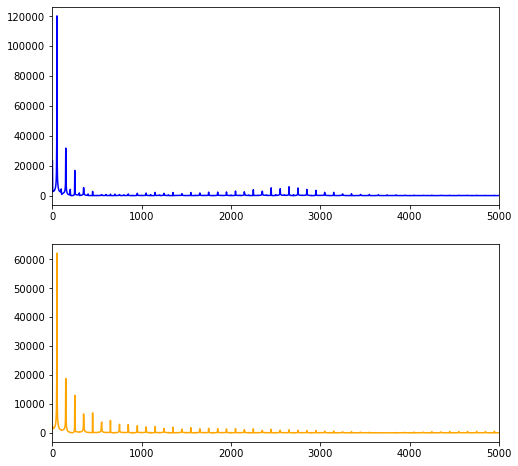

In [55]:
F=3.5
f=800

x=X.to_numpy()
y=Y.to_numpy()

Xf = fft.fft(x)
Yf = fft.fft(y)
        
samp = len(x)
tau = 3.2e-7 # time interval

freq = fft.fftfreq(len(x), tau)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])

axs1.set_xlim(left=0, right=5000, emit=True, auto=False)
axs2.set_xlim(left=0, right=5000, emit=True, auto=False)

axs1.plot(freq[freq>=0], np.abs(Yf)[freq>=0], color='blue')
axs2.plot(freq[freq>=0], np.abs(Xf)[freq>=0], color='orange')
                
plt.savefig('chaos-fft.png')